In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取資料

In [27]:
# 讀取資料
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [28]:
print(df.isnull().sum())

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


# 查看 Education Level、IT Student、Adaptivity Level有哪些值

In [21]:
# 查看 'Education Level' 的不同值
print(df['Education Level'].unique())

# 查看 'IT Student' 的不同值
print(df['IT Student'].unique())

# 查看 'Adaptivity Level' 的不同值
print(df['Adaptivity Level'].unique())

['University' 'College' 'School']
['No' 'Yes']
['Moderate' 'Low' 'High']


# 把Education Level、IT Student、Adaptivity Level改為數值

In [22]:
# Education Level 
education_mapping = {
    'University': 1,
    'College': 2,
    'School': 3
}
df['Education Level'] = df['Education Level'].map(education_mapping)

# IT Student
it_student_mapping = {
    'Yes': 1,
    'No': 0
}
df['IT Student'] = df['IT Student'].map(it_student_mapping)


# Adaptivity Level
adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level'] = df['Adaptivity Level'].map(adaptivity_mapping)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,1,Non Government,0,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,Girl,21-25,1,Non Government,0,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,Girl,16-20,2,Government,0,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,Girl,11-15,3,Non Government,0,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,Girl,16-20,3,Non Government,0,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,1


# 直條圖顯示結果

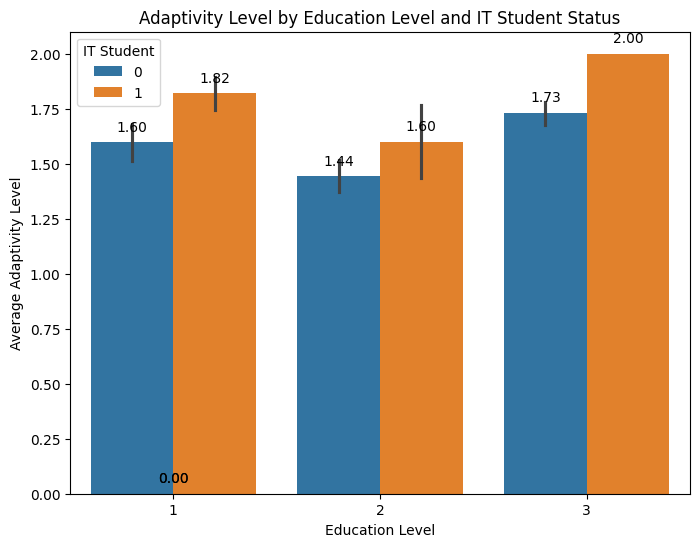

In [23]:
# 使用直條圖顯示不同教育程度和是否為資訊科技相關專業學生對適應性等級的影響
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Education Level', y='Adaptivity Level', hue='IT Student', data=df)
plt.title('Adaptivity Level by Education Level and IT Student Status')
plt.xlabel('Education Level')
plt.ylabel('Average Adaptivity Level')

# 在每個直條上標註數字
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}'.format(height), ha='center')

plt.show()

# 顯示各教育程度的學生總數

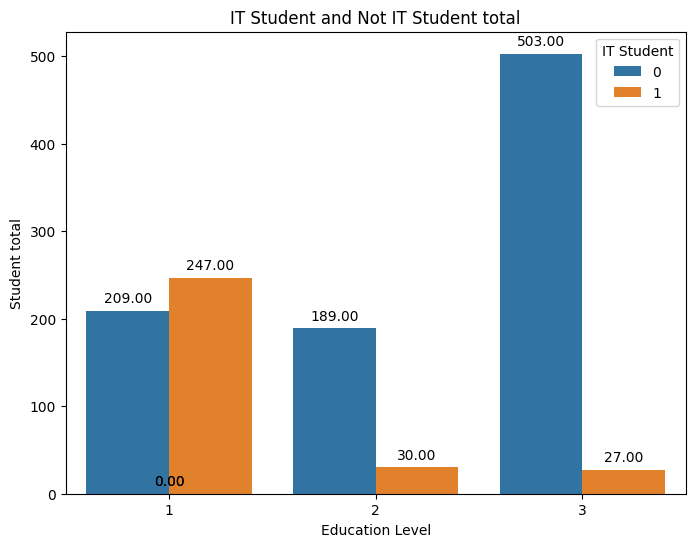

In [25]:
# IT Student 學生和 NOT IT Student 學生的分佈情況
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Education Level', hue='IT Student', data=df)

# 在每個直條圖上顯示學生總數
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center',
                va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('IT Student and Not IT Student total')
plt.xlabel('Education Level')
plt.ylabel('Student total')
plt.show()

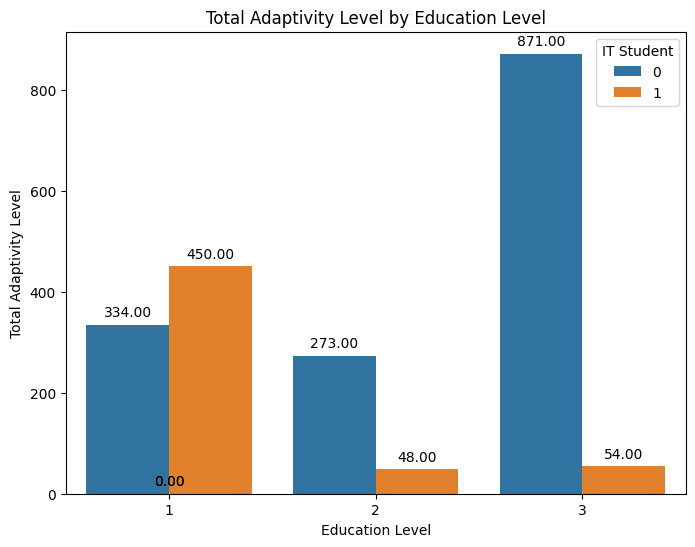

In [26]:
# 計算適應性等級值總和
df['Total Adaptivity Level'] = df['Adaptivity Level']  # 將原始適應性等級映射為數值
adaptivity_sum = df.groupby(['Education Level', 'IT Student'])['Total Adaptivity Level'].sum().reset_index()

# 使用barplot顯示不同教育程度和是否為資訊科技相關專業學生對適應性等級值總和
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Education Level', y='Total Adaptivity Level', hue='IT Student', data=adaptivity_sum)

# 在每個直條圖上標註數值
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center',
                va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Total Adaptivity Level by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Adaptivity Level')
plt.show()

# Conclution

## 通過對不同教育程度學生的適應性等級進行分析，我們得出以下結論：

### 1.資訊相關背景對適應性等級的影響：

#### 在所有教育程度中，具有資訊相關背景的學生，無論是University、College還是School，其平均適應性等級都明顯高於沒有資訊相關背景的學生。這可能暗示了資訊技術知識和技能對於提高學生適應性的重要性。

### 不同教育程度的平均適應性等級比較：

#### 在所有學生中，School的學生的平均適應性等級最高，其次是University的學生，最後是College的學生。雖然這些差距可能受樣本數量的影響，但是不論在哪個教育程度，有資訊相關背景的學生總體上還是都表現更好。